In [1]:
#Step1 - Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
data.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

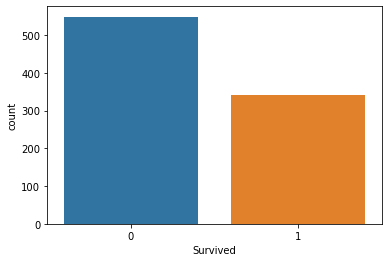

In [6]:
sns.countplot(x='Survived', data=data)
plt.show()

In [7]:
data_new=data.drop(columns=['Unnamed: 0','Name','Ticket','Cabin','Embarked'])
data_new['Sex'] = data_new['Sex'].replace({'male':1,'female':0})
data_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [8]:
#Step5 – Select features that have a strong correlation(i.e. close to +1 ; recall our classes on correlation) with the Label and place them at the top using the SelectKBest feature selection method; This method uses the f_classif function to find best features, where f_classif uses ANOVA test.
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
data_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [14]:
data_new['Age'].fillna(value=data_new['Age'].mean(),inplace=True)

In [15]:
data_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [16]:
data_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [17]:
X=data_new.drop('Survived', axis=1)
Y=data_new['Survived']#or data.Survived

In [24]:
#Step5 – Select features that have a strong correlation(i.e. close to +1 ; recall our classes on correlation) with the Label and place them at the top using the SelectKBest feature selection method; This method uses the f_classif function to find best features, where f_classif uses ANOVA test.
from sklearn.feature_selection import SelectKBest, f_classif

In [23]:
best_features = SelectKBest(score_func=f_classif, k=7)#the score_func is about getting the fscore(i.e f_classif) for each feature comparison with the Label. The f_classif is uses the ANOVA Test to calculate for the fscore. While K=17 means, out of the 30 features, I want to consider the top-best 17 features that have a strong correlation with the Label. Also note there is no standard value for k, rather the choice of k=17 comes with research as that gives the optimum accuracy. Then you instantiate/store all into best_features
fit=best_features.fit(X,Y)#getting the fscores and instantiating it into fit
data_scores = pd.DataFrame(fit.scores_)#convert the fscores into a DataFrame
data_columns = pd.DataFrame(X.columns)#convert the names of each feature into a DataFrame

#Concatenate both dataframes
feature_scores = pd.concat([data_columns,data_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] #renaming the columns
print(feature_scores.nlargest(17,'Score'))#print the best 17 features

  Feature_Name       Score
2          Sex  372.405724
1       Pclass  115.031272
6         Fare   63.030764
5        Parch    5.963464
3          Age    4.353516
4        SibSp    1.110572
0  PassengerId    0.022285


# Model Building

In [27]:
#Step6 – extracting all 7 features in a dataframe and scaling data
new_X=data_new[['Sex','Pclass','Fare','Parch','Age','SibSp','PassengerId']]
new_X

,Sex,Pclass,Fare,Parch,Age,SibSp,PassengerId
0,1,3,7.2500,0,22.000000,1,1
1,0,1,71.2833,0,38.000000,1,2
2,0,3,7.9250,0,26.000000,0,3
3,0,1,53.1000,0,35.000000,1,4
4,1,3,8.0500,0,35.000000,0,5
...,...,...,...,...,...,...,...
886,1,2,13.0000,0,27.000000,0,887
887,0,1,30.0000,0,19.000000,0,888
888,0,3,23.4500,2,29.699118,1,889
889,1,1,30.0000,0,26.000000,0,890


In [28]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(new_X)

In [29]:
from time import time#This is not required but relevant in showing us the time taken for the training and testing phase

x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25, random_state=355)

knn=KNeighborsClassifier()#instantiating or initializing

#checking training and testing time (lazy learner)
start=time()#initializing and getting ready to measure time during training
knn.fit(x_train,y_train)
print('Knn training time = ',(time() - start))


start=time()#initializing and getting ready to measure time during training
y_pred=knn.predict(x_test)
print('Knn testing time = ',(time() - start))

Knn training time =  0.009972810745239258
Knn testing time =  0.01994919776916504


In [30]:
#Step6 – calcutaing the confusion matrix and classification report
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[125,  20],
       [ 24,  54]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred,digits=2))#the 'digits=2' argument here means number of decimal places you want the values of your report to provided

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       145
           1       0.73      0.69      0.71        78

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [33]:
#kfold method
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [34]:
for train, test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train :',train, ' test :',test)

train : [4 5 6 7 8 9]  test : [0 1 2 3]
train : [0 1 2 3 7 8 9]  test : [4 5 6]
train : [0 1 2 3 4 5 6]  test : [7 8 9]


In [35]:
#Step 7 lets use Cross Validation Score to check if model is overfitting
cross_val_score(knn, X_scaled, Y, cv=5)

array([0.79329609, 0.79775281, 0.80898876, 0.80337079, 0.82022472])

In [36]:
cross_val_score(KNeighborsClassifier(),X_scaled,Y,cv=5).mean()#taking the mean of the above array

0.8047266336074321

In [37]:
#If you compare the above result with our metric accuracy report(i.e 0.80), you will observe they are close and hence we can say that our model is not overfitting.

In [38]:
#Step 8 Now lets go ahead with Hyperparameter tunning
from sklearn.model_selection import GridSearchCV#Note its capital sensitive nature

In [39]:
#Prepare your list of parameters with options
#KNN algorithm has two methods - kd_tree and bruteforce methods
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}#n_neighbors means k=3? k=5? etc

In [40]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)#estimator means what type of algorithm i.e LinearRegression, LogisticRegression or knn(knn in this case). hence param_grid must be for a knn model

In [41]:
gridsearch.fit(x_train,y_train)#this will pick the best combination from the param_grid i.e.kd_tree,3,3 or kd_tree,3,5 or brute,3,3 and so on and then train with it

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [42]:
#Now lets get that best parameter
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 9}

In [43]:
#we will now use the best parameters in our KNN model and check if accuracy improved or increased
knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 9)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [45]:
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [46]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[124,  21],
       [ 25,  53]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       145
           1       0.72      0.68      0.70        78

    accuracy                           0.79       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



In [48]:
#You can see the accuracy is almost the same(i.e 0.80 & 0.79), hence the hyperparameter tunning had little or no effect!

In [49]:
#Now lets save our model and make it available for use!
import pickle

In [52]:
pickle.dump(KNeighborsClassifier,open('knn_model_titanic','wb'))

In [53]:
#You can check your J.N Home page for the file named "knn_Model_titanic"